In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
emails=pd.read_csv("D:\\Projects\\Email Spam Detection\\archive\\spam.csv",encoding="latin1")

In [4]:
emails.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
emails.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [6]:
emails.isnull().sum()

v1    0
v2    0
dtype: int64

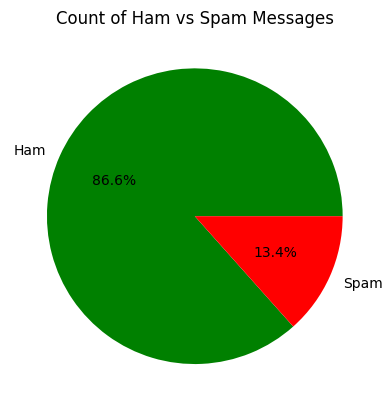

In [7]:
ham_count = emails[emails["v1"] == "ham"].shape[0]
spam_count = emails[emails["v1"] == "spam"].shape[0]
plt.pie([ham_count, spam_count], labels=["Ham", "Spam"], colors=["green", "red"],autopct='%1.1f%%')
plt.title("Count of Ham vs Spam Messages")
plt.show()

In [8]:
hams = emails[emails.v1 == 'ham']
spams = emails[emails.v1 == 'spam']
new_hams = resample(hams, replace=False, n_samples=len(spams), random_state=1)

new_emails = pd.concat([new_hams, spams])

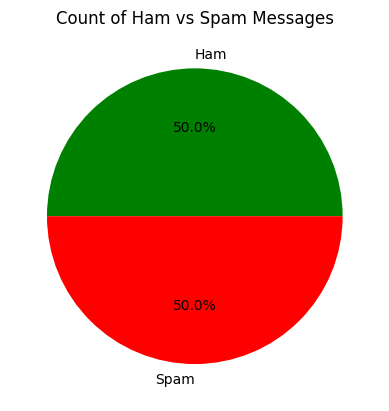

In [9]:
new_ham_count = new_emails[new_emails["v1"] == "ham"].shape[0]
new_spam_count = new_emails[new_emails["v1"] == "spam"].shape[0]
plt.pie([new_ham_count, new_spam_count], labels=["Ham", "Spam"], colors=["green", "red"],autopct='%1.1f%%')
plt.title("Count of Ham vs Spam Messages")
plt.show()

In [10]:
X=new_emails['v2']
y=new_emails['v1']

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [12]:
vect=TfidfVectorizer()

In [13]:
train_x_tfidf=vect.fit_transform(train_x)
test_x_tfidf=vect.transform(test_x)

In [14]:
model=LogisticRegression()

In [15]:
model.fit(train_x_tfidf,train_y)

LogisticRegression()

In [16]:
pred_y=model.predict(test_x_tfidf)

In [20]:
model.score(test_x_tfidf,test_y)*100

97.9933110367893

In [18]:
pred_y

array(['spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'spam', 'spam', 'ham'

In [19]:
test_y

1687    spam
34      spam
5071    spam
348     spam
1989     ham
        ... 
2957    spam
3168     ham
1173     ham
4723    spam
4340     ham
Name: v1, Length: 299, dtype: object